# Ensembles of Decision Trees

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Random forests

In [2]:
from helpers.helpers_tree import randomized_tree_interactive
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

randomized_tree_interactive(X,y)

interactive(children=(Dropdown(description='random_state', options=(10, 20, 30, 40, 50, 60, 70, 80, 90), value…

### Building random forests

### Analyzing random forests

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection  import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

In [4]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

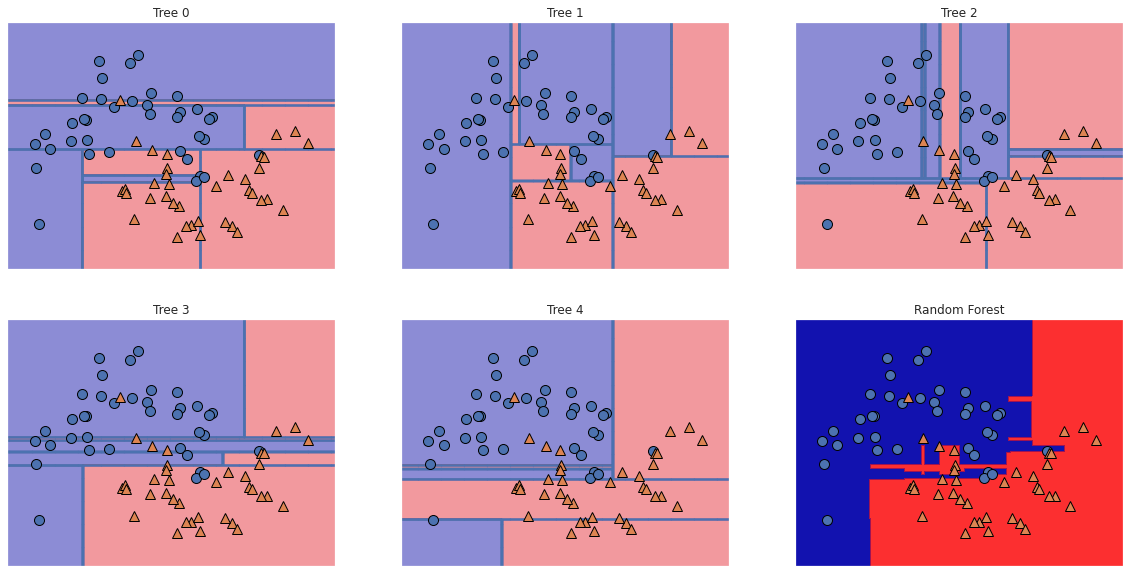

In [5]:
from helpers.plot_interactive_tree import plot_tree_partition
from helpers.plot_2d_separator import plot_2d_separator
from helpers.plot_helpers import discrete_scatter

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    plot_tree_partition(X_train, y_train, tree, ax=ax)
    plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
    
axes[-1, -1].set_title("Random Forest")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(f"Accuracy on training set: {forest.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {forest.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [19]:
X_train.shape

(426, 30)

In [26]:
traning_scores = {}
testing_scores = {}

max_features_list = range(1, X_train.shape[1] + 1 , 2)

for max_features in max_features_list:
    forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=0, n_jobs=4).fit(X_train, y_train)
    traning_scores[max_features] = forest.score(X_train, y_train)
    testing_scores[max_features] = forest.score(X_test, y_test)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


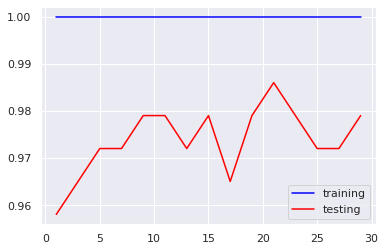

In [27]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.show()

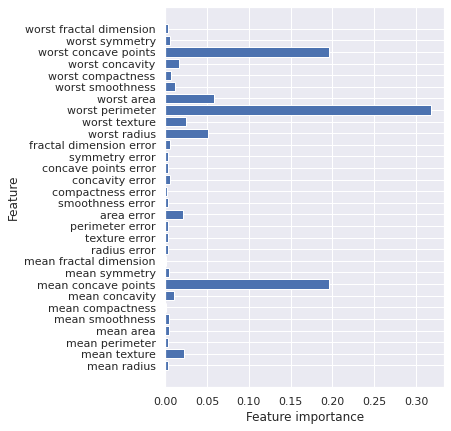

In [28]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(5, 7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importances_cancer(forest)

### Strengths, weaknesses, and parameters

### Example: Random Forest for Classifying Digits

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

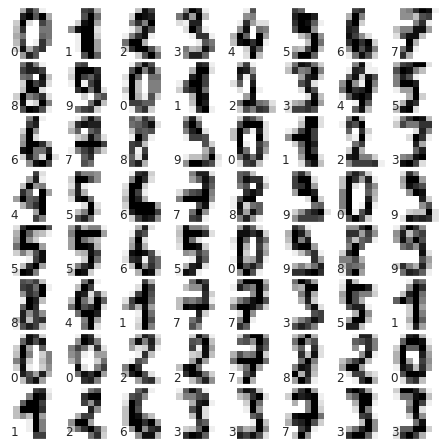

In [30]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

In [33]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [34]:
model.score(Xtest, ytest)

0.9755555555555555

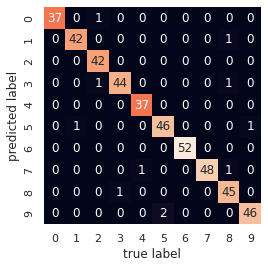

In [35]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Random Forest Regression

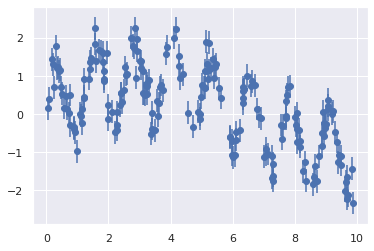

In [36]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');
plt.show()

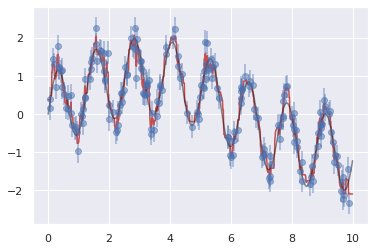

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);
plt.show()

## Gradient boosted regression trees (gradient boosting machines)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [39]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [40]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.965


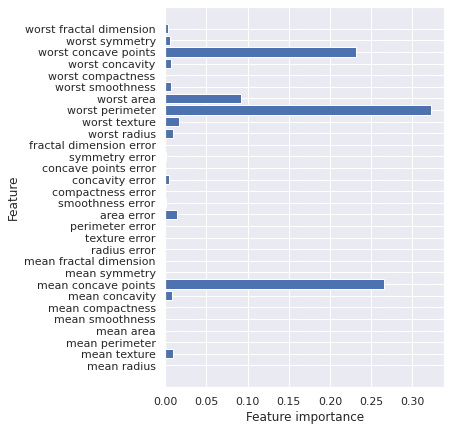

In [41]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### Strengths, weaknesses, and parameters